In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson
from scipy.stats import shapiro


In [4]:
csv_file = "/Volumes/CERVICAL/CERVICAL_ID/Connectome_analysis/Final_dataset/Results/all_brains.csv"
df_all = pd.read_csv(csv_file)

only_leaves = True

# Outliers

In [5]:
# Outliers
df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
outlier = df["Synapses"].idxmax()
print(outlier)
val_out = df[df.index == outlier]
val_out


out = ["Right: CP", "Left: ISN"]
out_dict = {
    "Rigth: CP": "too high synapses count, due to sample 580",
    "Left: ISN": "too high cell densoty, due to sample 589"
}

16333


# Synapses Count

### Plot Distribution

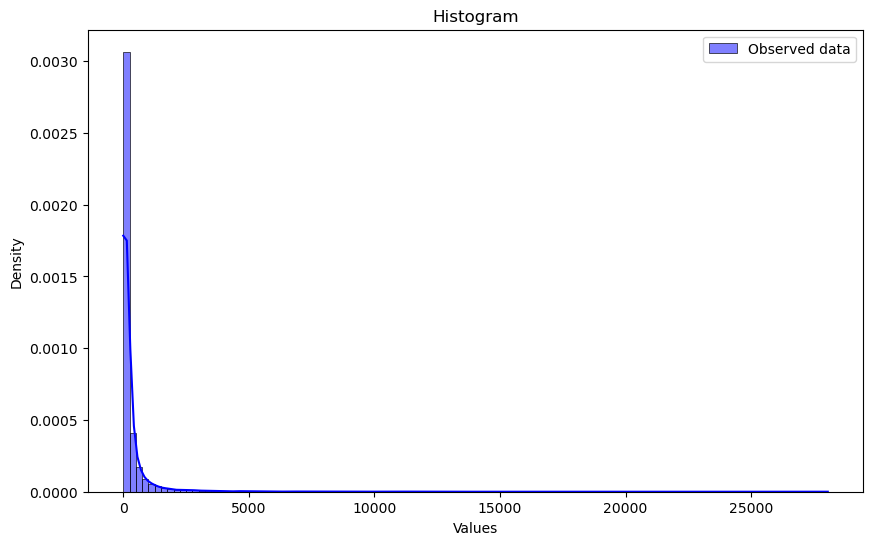

In [6]:
# Plot frequency of the values in the Synapses col
    #NB Only of Unijured as it is the real values
    #NB only leaves
        #bcause otherwise it is nested?????

if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Ectarct Values
values = df["Synapses"].to_list()

plt.figure(figsize=(10, 6))

# Plot histogram of the data
sns.histplot(values, binwidth=250, kde=True, color='blue', edgecolor='black', stat='density', label='Observed data')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram')
plt.legend()
plt.show()



### Test for Normality

In [7]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(values)
print(f'\nStatistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


Statistic: 0.2705343108780216
P-value: 1.1720889175386463e-125
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/envs/brainrender-env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19260.
  res = hypotest_fun_out(*samples, **kwds)


### Check Overdispersion

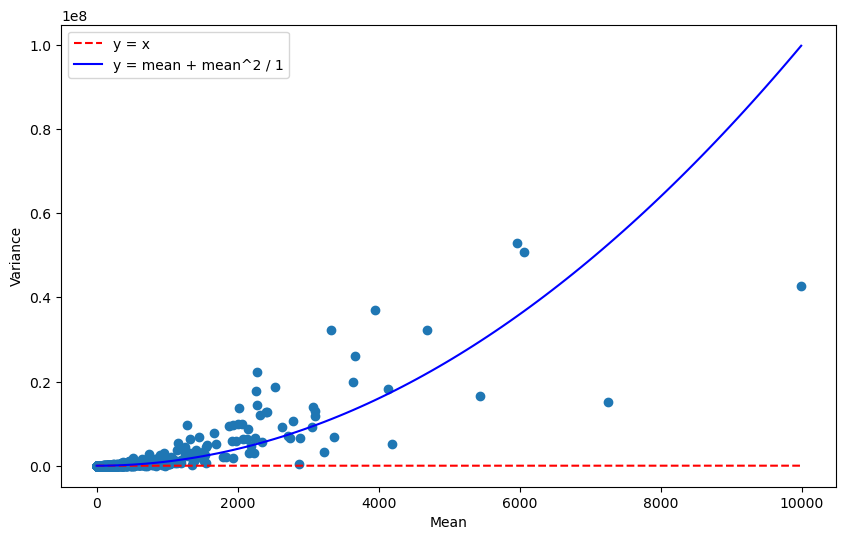

In [8]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Change shape df
df = df.pivot(index="ROI", columns=["Brain ID", "Region Injection", "TimePoint"], values="Synapses")


df["Mean"] = df.mean(axis=1)
df["Variance"] = df.var(axis=1)


plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Mean"], df["Variance"])

# Add y=x line
plt.plot([df["Mean"].min(), df["Mean"].max()], [df["Mean"].min(), df["Mean"].max()], color='red', linestyle='--', label='y = x')

# mu + mu^2/k
k = 1 # This is an example value; adjust based on your data range for better visualization
x_line = np.linspace(df["Mean"].min(), df["Mean"].max(), 100)
y_line = x_line + (x_line ** 2) / k
plt.plot(x_line, y_line, color='blue', linestyle='-', label=f'y = mean + mean^2 / {k}')


plt.xlabel('Mean')
plt.ylabel('Variance')
#plt.yscale('log')
plt.legend()
plt.show()

# Scatterplot Synapses Area

/var/folders/z_/g0l81j4x3j36y6bq_10vl03m0000gp/T/ipykernel_83179/2543072893.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


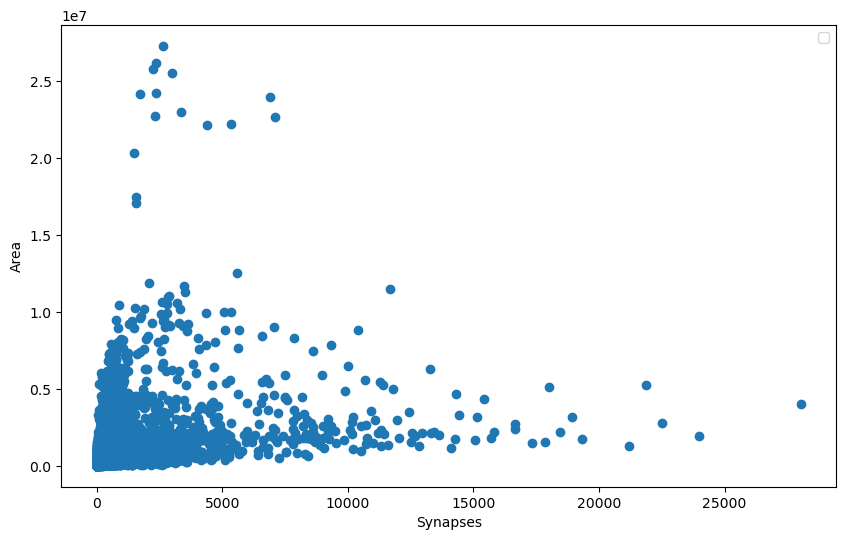

In [9]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Synapses"], df["Area"])

plt.xlabel('Synapses')
plt.ylabel('Area')
#plt.yscale('log')
plt.legend()
plt.show()

# Cell Density

### Plot Distribution

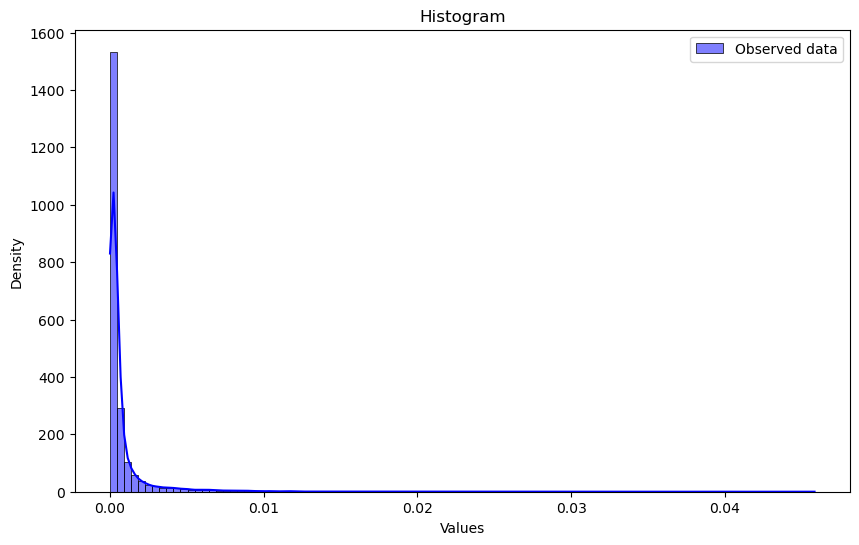

In [10]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Ectarct Values
values = df["Cell Density"].to_list()

plt.figure(figsize=(10, 6))

# Plot histogram of the data
sns.histplot(values, bins=100, kde=True, color='blue', edgecolor='black', stat='density', label='Observed data')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram')
plt.legend()
plt.show()


### Test for Normality

In [11]:
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(values)
print(f'\nStatistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('The data appears to be normally distributed (fail to reject H0).')
else:
    print('The data does not appear to be normally distributed (reject H0).')


Statistic: 0.37026053829634364
P-value: 1.5091877428962878e-121
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/envs/brainrender-env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19260.
  res = hypotest_fun_out(*samples, **kwds)


### Check Overdispersion

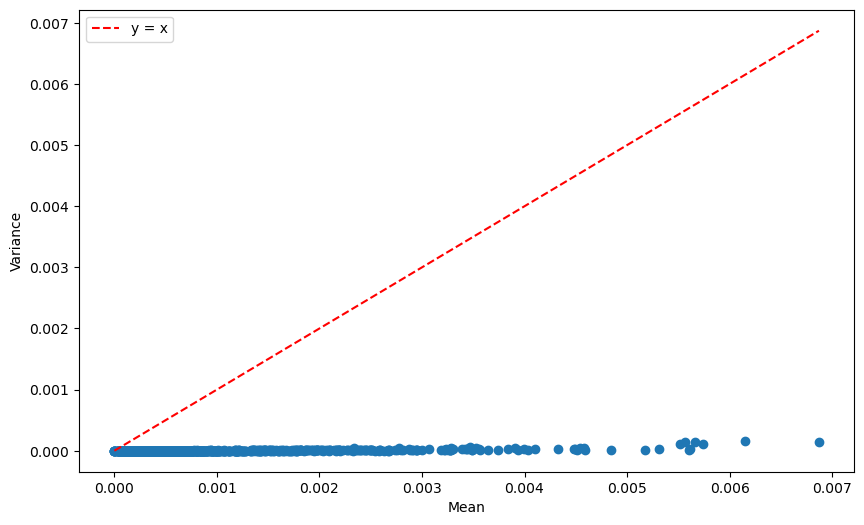

In [13]:
if only_leaves:
    df = df_all[(df_all["TimePoint"] == "Uninjured") & (df_all["IsLeaf"] == True)]
else:
    df = df_all[(df_all["TimePoint"] == "Uninjured")]

# Remove out
df = df[~(df["ROI"].isin(out))]

# Change shape df
df = df.pivot(index="ROI", columns=["Brain ID", "Region Injection", "TimePoint"], values="Cell Density")


df["Mean"] = df.mean(axis=1)
df["Variance"] = df.var(axis=1)


plt.figure(figsize=(10, 6))

# Scatterplot
plt.scatter(df["Mean"], df["Variance"])

# Add y=x line
plt.plot([df["Mean"].min(), df["Mean"].max()], [df["Mean"].min(), df["Mean"].max()], color='red', linestyle='--', label='y = x')

# mu + mu^2/k
k = 10000000 # This is an example value; adjust based on your data range for better visualization
x_line = np.linspace(df["Mean"].min(), df["Mean"].max(), 100)
y_line = x_line + (x_line ** 2) / k
#plt.plot(x_line, y_line, color='blue', linestyle='-', label=f'y = mean + mean^2 / {k}')


plt.xlabel('Mean')
plt.ylabel('Variance')
#plt.yscale('log')
plt.legend()
plt.show()